In [2]:
import platform

import tensorflow as tf

from sklearn.metrics import f1_score, confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras import layers, models

from tensorflow.keras.applications import DenseNet169

import os

import shutil



data_dir = '/kaggle/input/brain-tumor-mri-images-44c'

if platform.system() == 'Darwin':

    data_dir = './dataset'



BATCH_SIZE = 32

IMG_HEIGHT = 224

IMG_WIDTH = 224

EPOCHS = 20

VALIDATION_SPLIT = 0.2

SEED = 42



gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

In [3]:
merged_data_dir = "merged_dataset"



if not os.path.exists(merged_data_dir):

    os.makedirs(merged_data_dir)



for folder_name in os.listdir(data_dir):

    folder_path = os.path.join(data_dir, folder_name)

    if os.path.isdir(folder_path):

        prefix = folder_name.split(" ")[0]

        target_folder = os.path.join(merged_data_dir, prefix)

        if not os.path.exists(target_folder):

            os.makedirs(target_folder)

        for image_file in os.listdir(folder_path):

            source_path = os.path.join(folder_path, image_file)

            if os.path.isfile(source_path):

                shutil.copy(source_path, target_folder)

Found 4348 files belonging to 15 classes.
Using 3479 files for training.
Found 4348 files belonging to 15 classes.
Using 869 files for validation.
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


I0000 00:00:1732371712.383634     101 service.cc:145] XLA service 0x7c67dc002b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732371712.383703     101 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/109 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 9.1736 - sparse_categorical_accuracy: 0.0078       

I0000 00:00:1732371728.665437     101 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1732371728.692370     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 3.2301 - sparse_categorical_accuracy: 0.2570

I0000 00:00:1732371750.073702     100 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_4', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1732371761.645342     101 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 8 bytes spill stores, 8 bytes spill loads



109/109 ━━━━━━━━━━━━━━━━━━━━ 77s 418ms/step - loss: 3.2217 - sparse_categorical_accuracy: 0.2580 - val_loss: 1.8634 - val_sparse_categorical_accuracy: 0.3613
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 1.5418 - sparse_categorical_accuracy: 0.5240 - val_loss: 1.3564 - val_sparse_categorical_accuracy: 0.5765
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 1.2932 - sparse_categorical_accuracy: 0.6115 - val_loss: 1.2112 - val_sparse_categorical_accuracy: 0.6295
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 1.0381 - sparse_categorical_accuracy: 0.6924 - val_loss: 1.2653 - val_sparse_categorical_accuracy: 0.6030
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.9002 - sparse_categorical_accuracy: 0.7271 - val_loss: 1.0313 - val_sparse_categorical_accuracy: 0.6858
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.7867 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.9539 - val_sparse_categorical_accuracy: 0.7008
Epoch 7

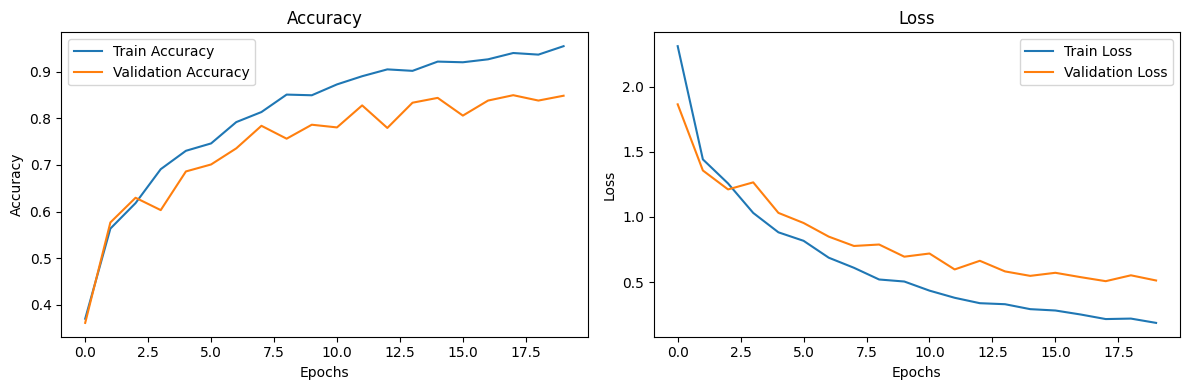

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


I0000 00:00:1732371953.013415     100 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 8 bytes spill stores, 8 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


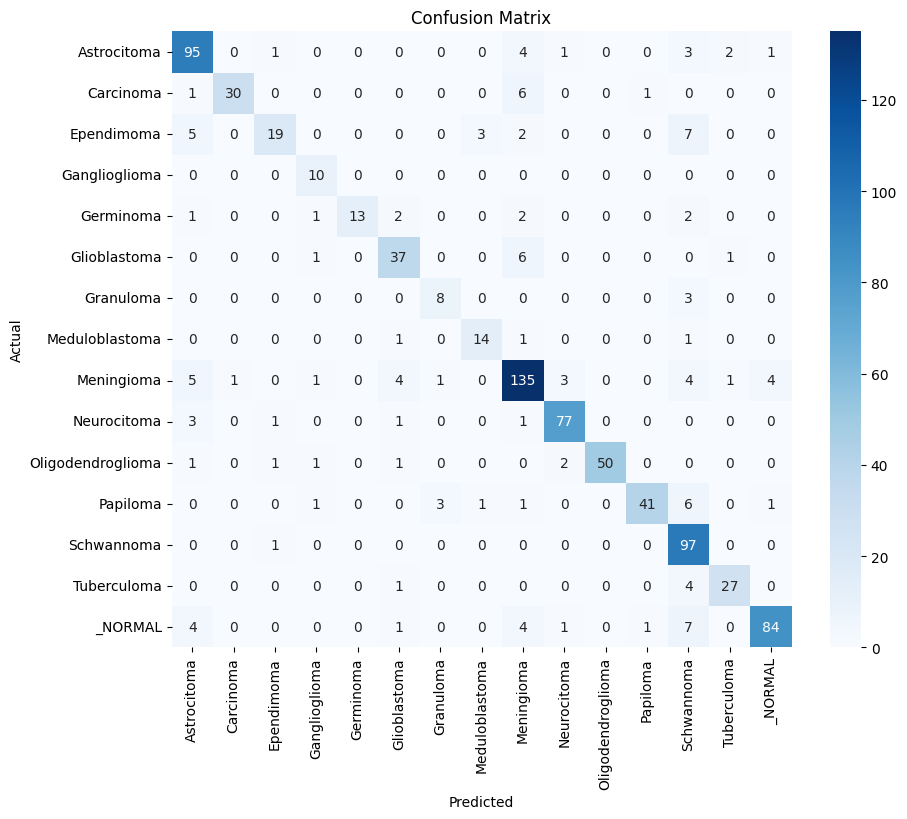

Weighted F1 Score: 0.8473
Classification Report:

                   precision    recall  f1-score   support

      Astrocitoma     0.8261    0.8879    0.8559       107
        Carcinoma     0.9677    0.7895    0.8696        38
       Ependimoma     0.8261    0.5278    0.6441        36
    Ganglioglioma     0.6667    1.0000    0.8000        10
        Germinoma     1.0000    0.6190    0.7647        21
     Glioblastoma     0.7708    0.8222    0.7957        45
        Granuloma     0.6667    0.7273    0.6957        11
   Meduloblastoma     0.7778    0.8235    0.8000        17
       Meningioma     0.8333    0.8491    0.8411       159
      Neurocitoma     0.9167    0.9277    0.9222        83
Oligodendroglioma     1.0000    0.8929    0.9434        56
         Papiloma     0.9535    0.7593    0.8454        54
       Schwannoma     0.7239    0.9898    0.8362        98
      Tuberculoma     0.8710    0.8438    0.8571        32
          _NORMAL     0.9333    0.8235    0.8750       102

    

In [4]:
# Train ML model



train_ds = image_dataset_from_directory(

    merged_data_dir,

    validation_split=VALIDATION_SPLIT,

    subset="training",

    seed=SEED,

    image_size=(IMG_HEIGHT, IMG_WIDTH),

    batch_size=BATCH_SIZE)



val_ds = image_dataset_from_directory(

    merged_data_dir,

    validation_split=VALIDATION_SPLIT,

    subset="validation",

    seed=SEED,

    image_size=(IMG_HEIGHT, IMG_WIDTH),

    batch_size=BATCH_SIZE)



base_model = DenseNet169(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

base_model.trainable = False



model = models.Sequential([

    base_model,

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),

    layers.Dense(44, activation='softmax')

])



model.compile(optimizer='adam',

              loss=tf.keras.losses.SparseCategoricalCrossentropy(),

              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



history = model.fit(

    train_ds,

    validation_data=val_ds,

    epochs=EPOCHS

)



def plot_history(history):

    plt.figure(figsize=(12, 4))

    

    plt.subplot(1, 2, 1)

    plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')

    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')

    plt.title('Accuracy')

    plt.xlabel('Epochs')

    plt.ylabel('Accuracy')

    plt.legend()

    

    plt.subplot(1, 2, 2)

    plt.plot(history.history['loss'], label='Train Loss')

    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Loss')

    plt.xlabel('Epochs')

    plt.ylabel('Loss')

    plt.legend()

    

    plt.tight_layout()

    plt.show()



plot_history(history)



val_labels = []

val_preds = []



for images, labels in val_ds:

    preds = model.predict(images)

    val_labels.extend(labels.numpy())

    val_preds.extend(np.argmax(preds, axis=1))



cm = confusion_matrix(val_labels, val_preds)



plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',

            xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.title('Confusion Matrix')

plt.show()



f1 = f1_score(val_labels, val_preds, average='weighted')

print(f'Weighted F1 Score: {f1:.4f}')



class_names = train_ds.class_names

report = classification_report(val_labels, val_preds, target_names=class_names, digits=4)

print("Classification Report:\n")

print(report)

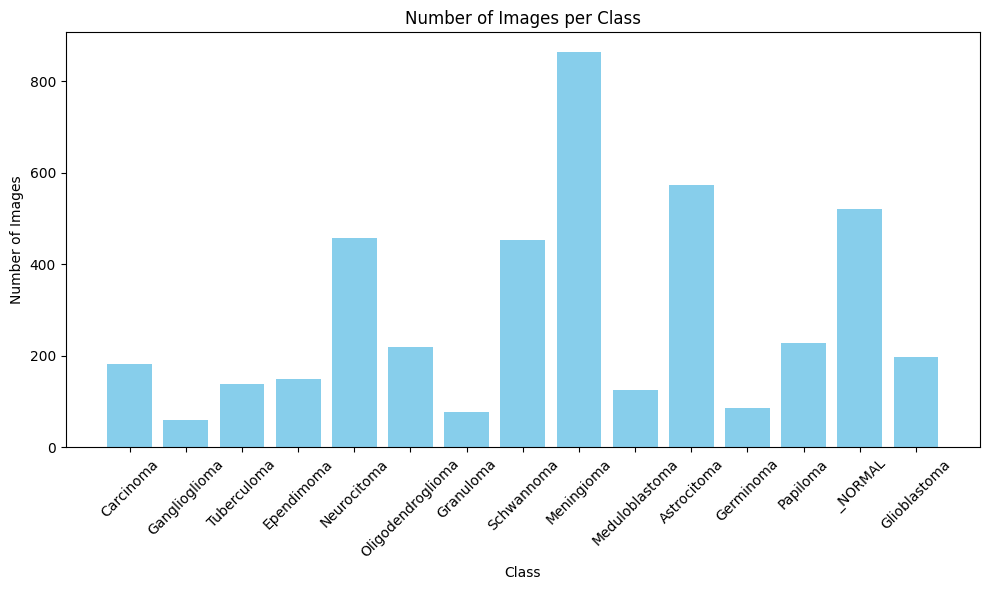

In [5]:


class_counts = {}

for class_name in os.listdir(merged_data_dir):

    class_path = os.path.join(merged_data_dir, class_name)

    if os.path.isdir(class_path):

        class_counts[class_name] = len([name for name in os.listdir(class_path) if name.endswith('.jpeg') or name.endswith('.jpg')])



plt.figure(figsize=(10, 6))

plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

plt.title('Number of Images per Class')

plt.xlabel('Class')

plt.ylabel('Number of Images')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()
